In [1]:
import numpy as np
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [2]:
# Generate synthetic data
np.random.seed(0)
data = np.vstack([
    np.random.normal(-5, 1, (100, 10)),  # Cluster 1
    np.random.normal(0, 2, (100, 10)),   # Cluster 2
    np.random.normal(3, 3, (100, 10))    # Cluster 3
])

# Initialize and fit DPGMM
dpgmm = BayesianGaussianMixture(n_components=10, covariance_type='full', max_iter=1000, random_state=0)
dpgmm.fit(data)


BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=0)

In [36]:
def plot_covariance_ellipse(position, covariance, ax=None, **kwargs):
    """ Plot a covariance ellipse. """
    ax = ax or plt.gca()
    if covariance.shape[0] == 2:
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
        for nsig in range(1, 4):
            ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))


In [37]:
import numpy as np
from sklearn.mixture import BayesianGaussianMixture


In [39]:
# Create 10-dimensional data
n_samples = 1000  # number of data points
n_features = 10   # dimensions

# Randomly generating a mixture of Gaussian distributed data
np.random.seed(0)
X = np.random.randn(n_samples, n_features)

In [40]:
# Creating the DPGMM model
dpgmm = BayesianGaussianMixture(
    n_components=10,         # Maximum number of mixture components
    covariance_type='full',  # Covariance type ('full' means each component has its own general covariance matrix)
    weight_concentration_prior_type='dirichlet_process',  # Using Dirichlet process
    max_iter=1000,           # Maximum number of iterations to run the EM algorithm
    random_state=0
)

# Fit the model to the data
dpgmm.fit(X)


BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=0)

In [41]:
# Sampling new data from the fitted model
n_samples_new = 100
X_new, y_new = dpgmm.sample(n_samples_new)

In [42]:
# Calculate the log of the PDF for the original and new data
log_pdf_original = dpgmm.score_samples(X)  # log probability for the original data
log_pdf_new = dpgmm.score_samples(X_new)   # log probability for the new sampled data

# Convert log PDFs to actual PDFs
pdf_original = np.exp(log_pdf_original)
pdf_new = np.exp(log_pdf_new)

In [ ]:
X_resampled = X[np.random.choice(X.shape[0], X.shape[0], replace=True)]
dpgmm_bootstrap = BayesianGaussianMixture(
    n_components=10,
    covariance_type='full',
    weight_concentration_prior_type='dirichlet_process',
    max_iter=1000,
    random_state=i
)
dpgmm_bootstrap.fit(X_resampled)

# Sample new data from the model
_, y_new_bootstrap = dpgmm_bootstrap.sample(n_samples_new)

In [46]:
# Number of bootstrap resamples
n_bootstrap = 10
n_samples_new = 1000
pdf_bootstrap = np.zeros((n_bootstrap, n_samples_new))

for i in range(n_bootstrap):
    # Resample the data (with replacement)
    X_resampled = X[np.random.choice(X.shape[0], X.shape[0], replace=True)]
    
    # Fit a new DPGMM model to the resampled data
    dpgmm_bootstrap = BayesianGaussianMixture(
        n_components=10,
        covariance_type='full',
        weight_concentration_prior_type='dirichlet_process',
        max_iter=1000,
        random_state=i
    )
    dpgmm_bootstrap.fit(X_resampled)
    
    # Sample new data from the model
    _, y_new_bootstrap = dpgmm_bootstrap.sample(n_samples_new)
    
    # Compute PDF for new sampled data
    log_pdf_new_bootstrap = dpgmm_bootstrap.score_samples(X_new)
    pdf_bootstrap[i, :] = np.exp(log_pdf_new_bootstrap)

# Compute the mean and standard deviation of PDFs across bootstrap samples
pdf_mean = np.mean(pdf_bootstrap, axis=0)
pdf_std = np.std(pdf_bootstrap, axis=0)


ValueError: could not broadcast input array from shape (100,) into shape (1000,)

ValueError: x and y must have same first dimension, but have shapes (1000,) and (100,)

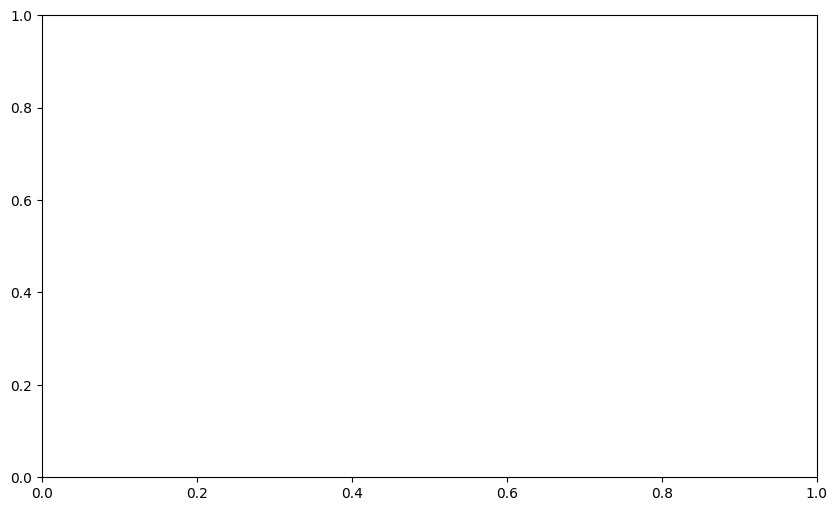

In [47]:
# Plotting the mean PDF with error bounds (standard deviation)
plt.figure(figsize=(10, 6))
plt.plot(range(n_samples_new), pdf_mean, label='Mean PDF', color='blue')

# Adding error bounds (standard deviation)
plt.fill_between(range(n_samples_new), 
                 pdf_mean - pdf_std, 
                 pdf_mean + pdf_std, 
                 color='lightblue', alpha=0.5, label='Standard Deviation')

# Adding labels and legend
plt.title('PDF with Error Bounds')
plt.xlabel('Sample Index')
plt.ylabel('PDF')
plt.legend()
plt.show()

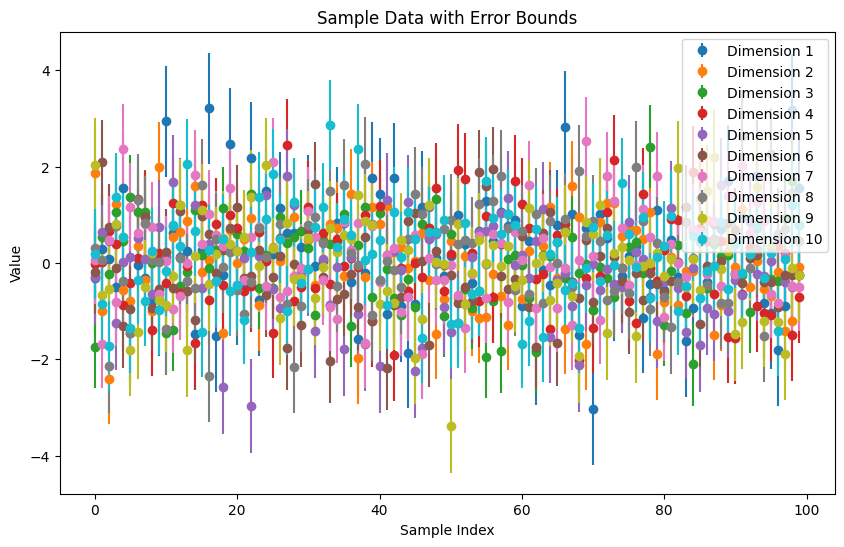

In [45]:
# Calculate mean and standard deviation for the newly sampled data
X_new_mean = np.mean(X_new, axis=0)
X_new_std = np.std(X_new, axis=0)

# Plotting the sampled data with error bounds (standard deviation)
plt.figure(figsize=(10, 6))
for i in range(X_new.shape[1]):
    plt.errorbar(range(n_samples_new), X_new[:, i], yerr=X_new_std[i], fmt='o', label=f'Dimension {i+1}')

plt.title('Sample Data with Error Bounds')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()
